# Visualisation of PISM output <a class="tocSkip">
This is an example/teaser how to visualise PISM model output with the Python package `xarray`. If you have questions or need help, feel free to contact me.
    
_- Moritz Kreuzer (PIK, kreuzer@pik-potsdam.de), November 2021_
    

## Prerequisites
To run this notebook your python environment needs the following packages:
 - numpy
 - xarray
 - cftime
 - matplotlib
 - cartopy
 - netcdf4
    
A suitable environment can be installed using [anaconda](https://anaconda.org/) or [mamba](https://mamba.readthedocs.io/) via:

    mamba create -n py_env_xarray numpy cftime=1.2.1 jupyter xarray matplotlib cartopy netcdf4
    source activate py_env_xarray

In [1]:
# importing packages
import numpy as np
import xarray as xr
import cftime

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [7]:
# change matplotlib standard parameters
plt.rcParams['figure.figsize'] = 12,8

# Plot Data

Loading data from disk. One PISM output file for the Antarctic and one for the Greenland ice sheet.

In [3]:
ds_ais =  xr.open_dataset('data/ais_extra.nc')
ds_gris = xr.open_dataset('data/gris_extra.nc')

## xarray's standard plotting functionality
xarray automatically uses available metadata to label axes, adds a colorbar, etc.

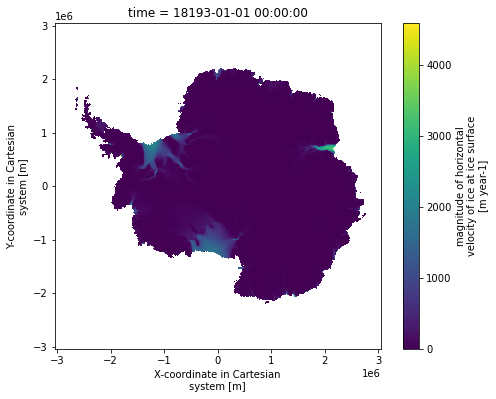

In [4]:
fig, axis = plt.subplots(1,1, figsize=(8,6))

ds_ais['velsurf_mag'].plot(ax=axis)

axis.set_aspect('equal')

## Plot data on a projection with cartopy
The cartopy package allows to plot data on maps and projections, which is useful when visualising spheric coordinates for example. For the Antarctic dataset, we choose a stereographic southpole projection and add a progressive colorbar.

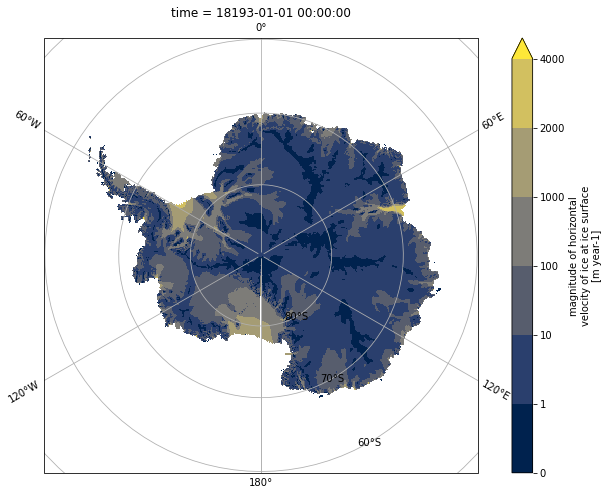

In [5]:
map_proj = ccrs.SouthPolarStereo()
levels = [0, 1, 10, 100, 1000, 2000, 4000]

ax = ds_ais['velsurf_mag'].plot(
    transform=ccrs.PlateCarree(),
    x='lon', y='lat',
    cmap='cividis',
    levels=levels,
    cbar_kwargs={'ticks': levels}, 
    subplot_kws={'projection': map_proj})

ax.axes.gridlines(draw_labels=True)

##  Adding coastlines with cartopy
Cartopy also comes with a predefined set of coastlines which can sometimes be useful to refer the data geographically. We plot here the ice sheet thickness of the Greenland data set. 

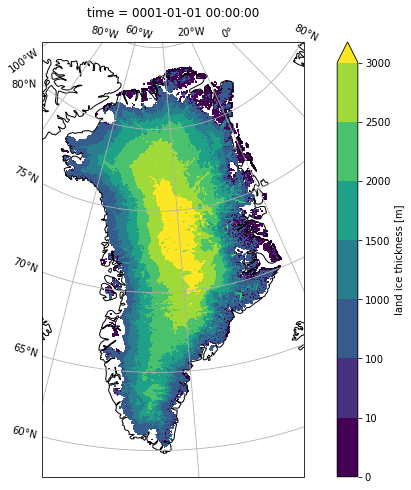

In [6]:
map_proj = ccrs.Orthographic(central_longitude=-45.0, central_latitude=80.0)
levels = [0, 10, 100, 1000, 1500, 2000, 2500, 3000]

ax = ds_gris['thk'].where(ds_gris['thk']>0,np.nan).plot(
    transform=ccrs.PlateCarree(),
    x='lon', y='lat',
    levels=levels,
    cbar_kwargs={'ticks': levels},
    subplot_kws={'projection': map_proj}
    )

ax.axes.coastlines()

gl = ax.axes.gridlines(draw_labels=True)
gl.bottom_labels = False
gl.right_labels = False